Выполните задания с помощью запроса в инструменте Infogram (альтернативное выполнение возможно в Python или другом инструменте для инфографики с ИИ), разместите результаты на одном полотне.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cars_ds_final.csv')
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


### 1) Постройте круговую диаграмму:
Распределение машин по типу привода — например, сколько процентов моделей с передним, задним или полным приводом (столбец Drivetrain). Покажите, какой тип привода наиболее популярен среди машин. Разбейте дополнительно каждый сегмент (например, полный привод, передний привод) по топ-3 брендам, которые чаще всего выпускают машины с этим приводом.

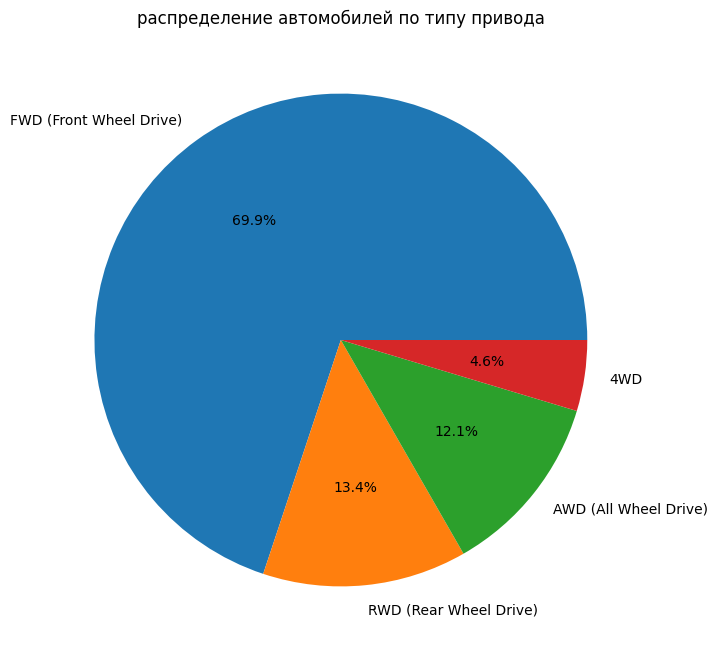

In [ ]:
drivetrain_counts = df['Drivetrain'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(drivetrain_counts, labels=drivetrain_counts.index, autopct='%1.1f%%')
plt.title('распределение автомобилей по типу привода')
plt.show()

In [ ]:
for drivetrain in df['Drivetrain'].unique()[:4]:
    top_brands = df[df['Drivetrain'] == drivetrain]['Make'].value_counts().head(3)
    print(f"топ-3 бренда для привода {drivetrain}:")
    print(top_brands)
    print()

топ-3 бренда для привода RWD (Rear Wheel Drive):
Make
Mahindra    25
Toyota      21
Jaguar      14
Name: count, dtype: int64

топ-3 бренда для привода FWD (Front Wheel Drive):
Make
Maruti Suzuki    141
Hyundai          128
Mahindra          87
Name: count, dtype: int64

топ-3 бренда для привода AWD (All Wheel Drive):
Make
Bmw     21
Audi    17
Jeep    13
Name: count, dtype: int64

топ-3 бренда для привода 4WD:
Make
Land Rover Rover    21
Land Rover          10
Mahindra             5
Name: count, dtype: int64



### 2) Построй сравнительный горизонтальный барплот:
Топ-10 брендов по количеству различных моделей в датасете (столбец Make). Покажите, какие бренды представлены наиболее широко. Для каждого бренда постройте среднюю цену моделей, при этом разбей цены по типу привода (Drivetrain).

In [ ]:
import seaborn as sns

top_10 = df['Make'].value_counts().head(10).index
top_10

Index(['Maruti Suzuki', 'Hyundai', 'Mahindra', 'Tata', 'Toyota', 'Honda',
       'Ford', 'Skoda', 'Bmw', 'Renault'],
      dtype='object', name='Make')

In [ ]:
filtered_df = df[df['Make'].isin(top_10)]

grouped = filtered_df.groupby(['Make', 'Drivetrain'])['Ex-Showroom_Price'].mean().reset_index()
grouped

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
print(df['Ex-Showroom_Price'].unique()[:20])

['Rs. 2,92,667' 'Rs. 2,36,447' 'Rs. 2,96,661' 'Rs. 3,34,768'
 'Rs. 2,72,223' 'Rs. 3,14,815' 'Rs. 2,79,650' 'Rs. 3,51,832'
 'Rs. 3,33,419' 'Rs. 3,62,000' 'Rs. 3,90,000' 'Rs. 4,37,065'
 'Rs. 3,53,290' 'Rs. 2,83,290' 'Rs. 3,83,290' 'Rs. 4,13,290'
 'Rs. 4,33,290' 'Rs. 4,54,490' 'Rs. 4,63,290' 'Rs. 4,84,490']


In [ ]:
import numpy as np

def clean_price_complex(price_str):
    try:
        if isinstance(price_str, str):
            # если найдено несколько цен - берем первую
            if 'Rs.' in price_str and price_str.count('Rs.') > 1:
                first_price = price_str.split('Rs.')[1].split()[0]
                return float(first_price.replace(',', ''))
            else:
                return float(price_str.replace('Rs. ', '').replace(',', ''))
        elif isinstance(price_str, (int, float)):
            return float(price_str)
        return np.nan
    except:
        return np.nan

df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].apply(clean_price_complex)

print(df['Ex-Showroom_Price'].head())
print("\nУникальные значения цен:")
print(df['Ex-Showroom_Price'].value_counts().head())

0    292667.0
1    236447.0
2    296661.0
3    334768.0
4    272223.0
Name: Ex-Showroom_Price, dtype: float64

Уникальные значения цен:
Ex-Showroom_Price
999900.0    14
999990.0     4
989000.0     3
745000.0     3
925000.0     3
Name: count, dtype: int64


In [ ]:
filtered_df = df[df['Make'].isin(top_10)]

grouped = filtered_df.groupby(['Make', 'Drivetrain'])['Ex-Showroom_Price'].mean().reset_index()
grouped

,Make,Drivetrain,Ex-Showroom_Price
0,Bmw,4WD,5.803333e+06
1,Bmw,AWD (All Wheel Drive),9.647143e+06
2,Bmw,RWD (Rear Wheel Drive),6.575385e+06
3,Ford,AWD (All Wheel Drive),3.470000e+06
4,Ford,FWD (Front Wheel Drive),8.010439e+05
5,Ford,RWD (Rear Wheel Drive),4.538333e+06
6,Honda,AWD (All Wheel Drive),3.277001e+06
7,Honda,FWD (Front Wheel Drive),1.173266e+06
8,Hyundai,4WD,2.388567e+06
9,Hyundai,FWD (Front Wheel Drive),9.655845e+05


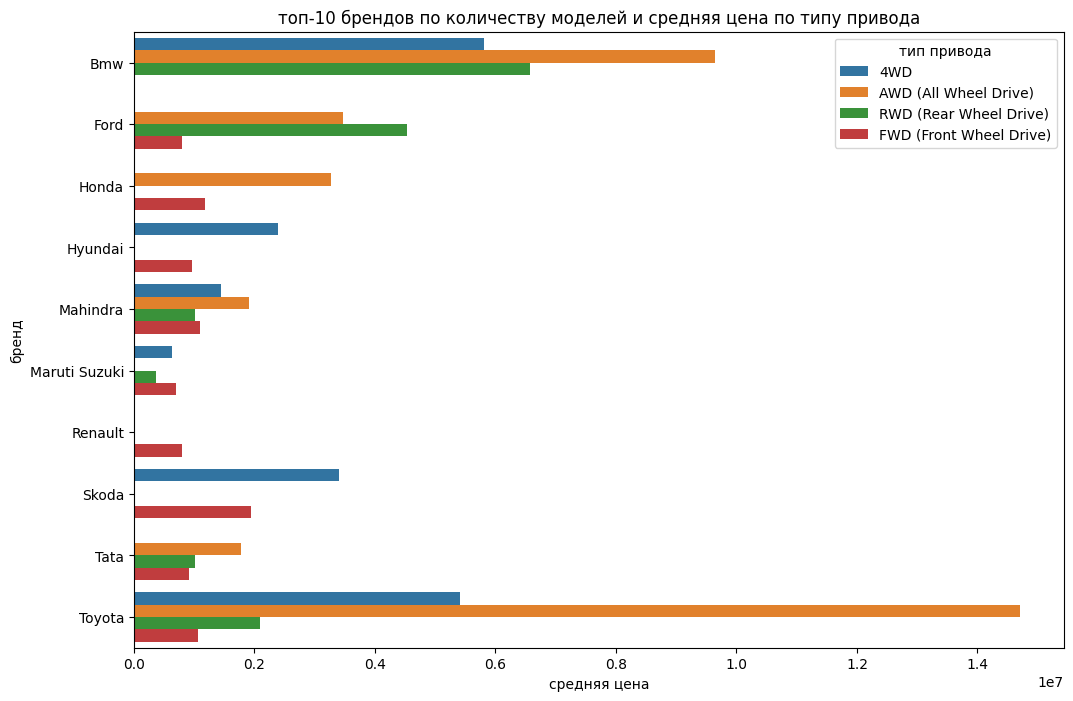

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped, y='Make', x='Ex-Showroom_Price', hue='Drivetrain', orient='h')
plt.title('топ-10 брендов по количеству моделей и средняя цена по типу привода')
plt.xlabel('средняя цена')
plt.ylabel('бренд')
plt.legend(title='тип привода')
plt.show()

### 3) Постройте точечный график:
Связь объема двигателя (Displacement) и цены (Ex-Showroom_Price), цвет точек — это тип топлива (Fuel_Type), размер точек — это количество цилиндров (Cylinders). Есть ли зависимость между объемом двигателя и ценой автомобиля?


In [ ]:
df['Displacement'].value_counts()

,count
Displacement,
1197 cc,108
1498 cc,87
1248 cc,62
1198 cc,58
1497 cc,56
...,...
1993 cc,1
5700 cc,1
1047 cc,1


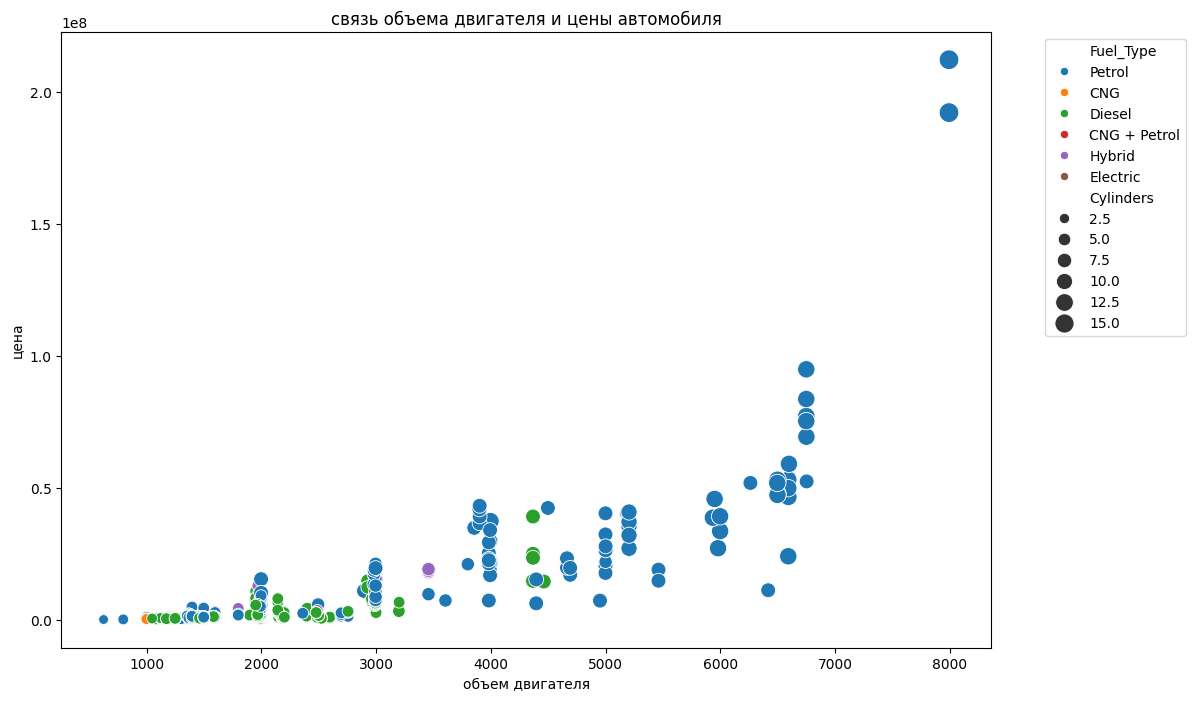

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',
                hue='Fuel_Type', size='Cylinders', sizes=(50, 200))
plt.title('cвязь объема двигателя и цены автомобиля')
plt.xlabel('объем двигателя')
plt.ylabel('цена')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 4) Постройте тепловую карту:
Разделите машины на группы по объему двигателя:
Малолитражки (до 1200cc),
Средние (1200–2000cc),
Большие (>2000cc).


Для каждой группы посчитайте корреляцию между:
Количеством цилиндров;
Количеством клапанов на цилиндр;
Объём двигателя.



In [ ]:
df['Displacement'] = df['Displacement'].str.replace(' cc', '').str.replace(',', '').astype(float)

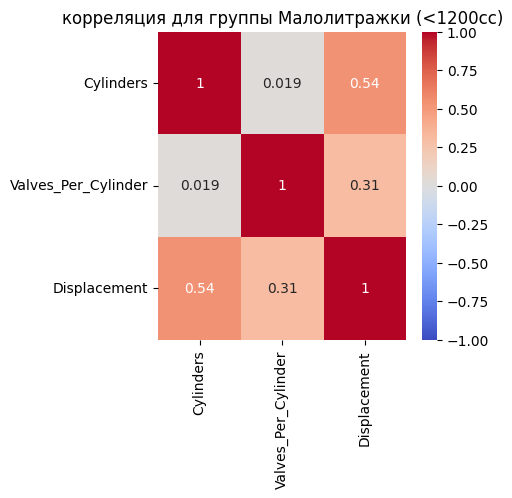

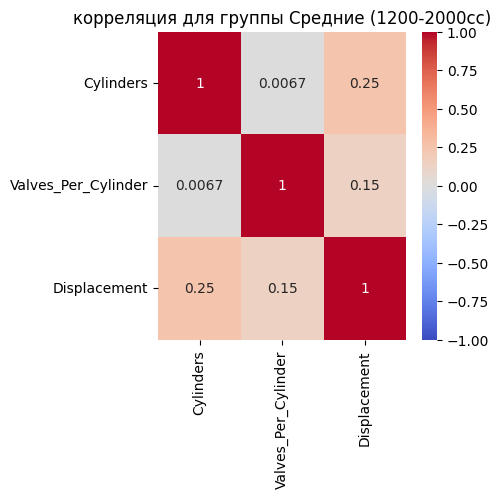

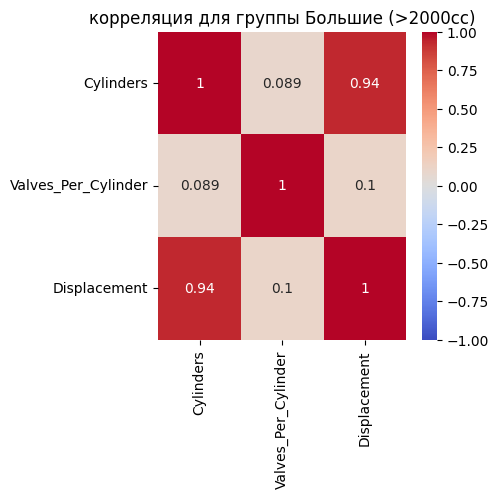

In [ ]:
bins = [0, 1200, 2000, float('inf')]
labels = ['Малолитражки (<1200cc)', 'Средние (1200-2000cc)', 'Большие (>2000cc)']
df['Engine_Group'] = pd.cut(df['Displacement'], bins=bins, labels=labels)

# для расчета корреляции и построения тепловой карты
def plot_corr_heatmap(group):
    group_df = df[df['Engine_Group'] == group]
    corr = group_df[['Cylinders', 'Valves_Per_Cylinder', 'Displacement']].corr()
    plt.figure(figsize=(4, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'корреляция для группы {group}')
    plt.show()

for group in labels:
    plot_corr_heatmap(group)

### Общее полотно


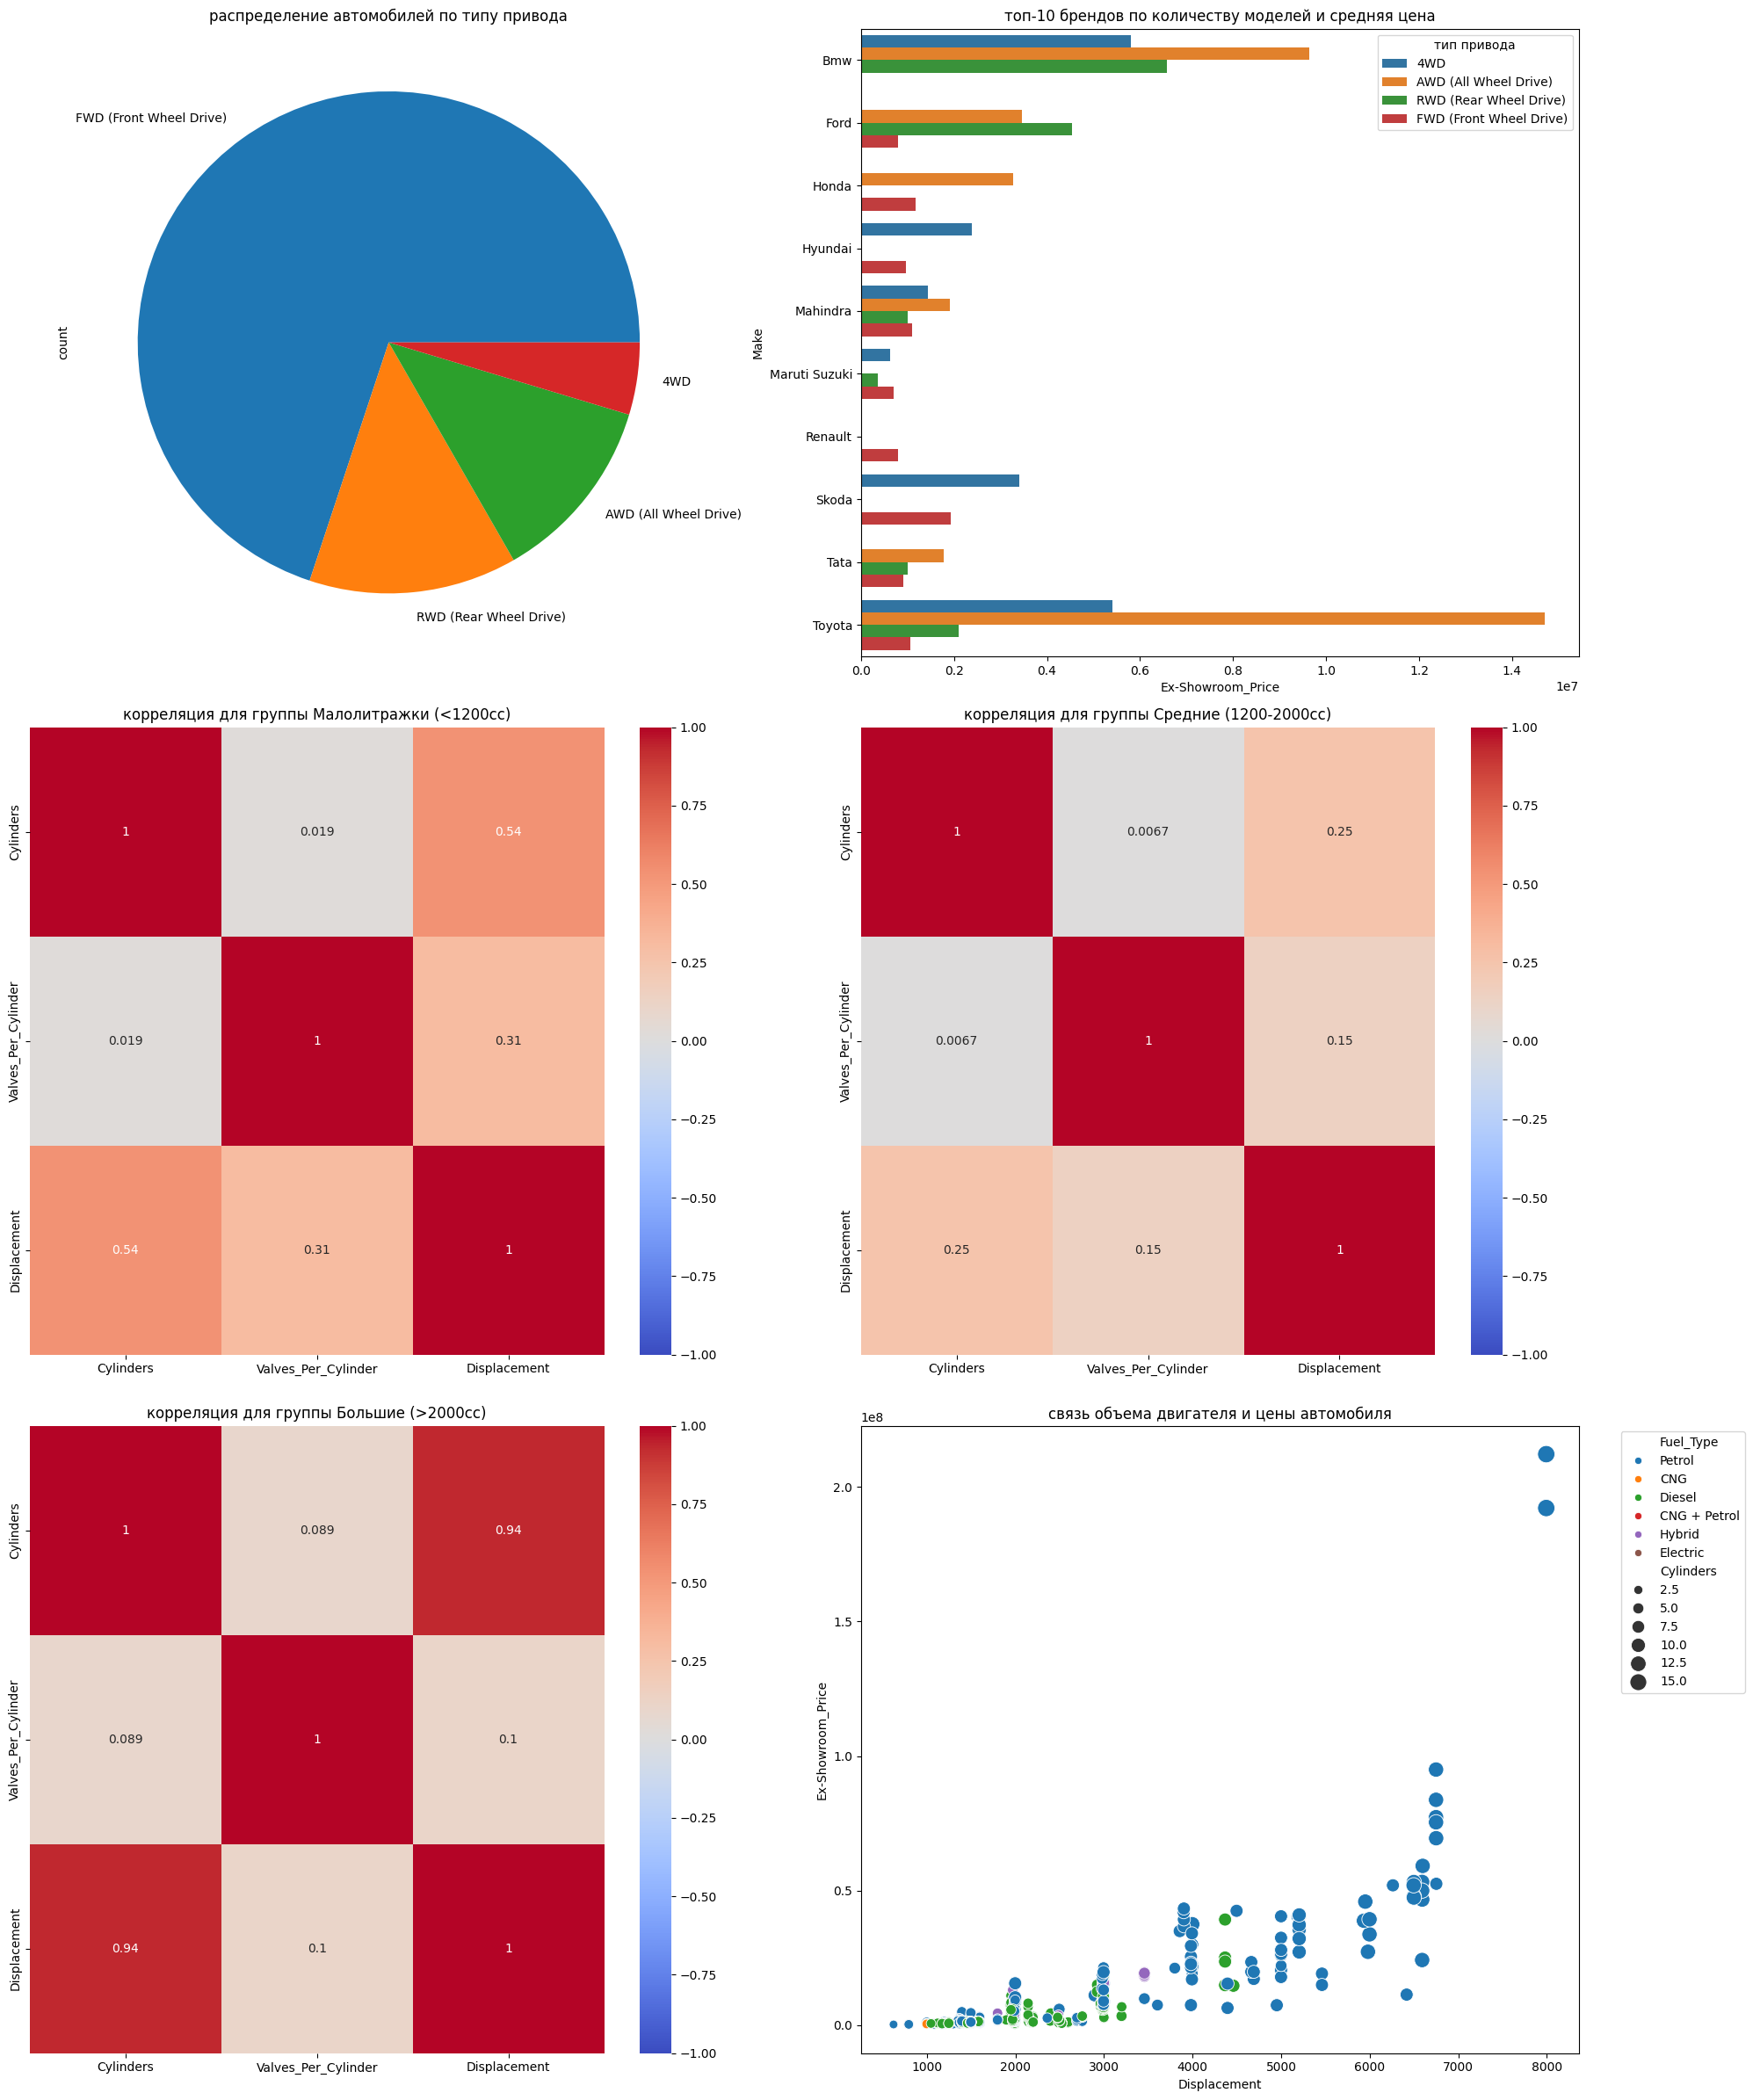

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 24))

drivetrain_counts.plot.pie(ax=axes[0, 0])
axes[0, 0].set_title('распределение автомобилей по типу привода')

sns.barplot(data=grouped, y='Make', x='Ex-Showroom_Price', hue='Drivetrain', orient='h', ax=axes[0, 1])
axes[0, 1].set_title('топ-10 брендов по количеству моделей и средняя цена')
axes[0, 1].legend(title='тип привода')

#sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',
               # hue='Fuel_Type', size='Cylinders', sizes=(50, 200), ax=axes[1, 0])
#axes[1, 0].set_title('связь объема двигателя и цены автомобиля')
#axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, label in enumerate(labels):
    group_df = df[df['Engine_Group'] == label]
    corr = group_df[['Cylinders', 'Valves_Per_Cylinder', 'Displacement']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
                ax=axes[1 + i//2, i%2])
    axes[1 + i//2, i%2].set_title(f'корреляция для группы {label}')

sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',
                hue='Fuel_Type', size='Cylinders', sizes=(50, 200))
axes[2, 1].set_title('cвязь объема двигателя и цены автомобиля')
axes[2, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()